[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayushirahane/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Dataset loaded successfully!
Shape: (20000, 2)
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

Sample cleaned text:
                                                text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                          clean_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  


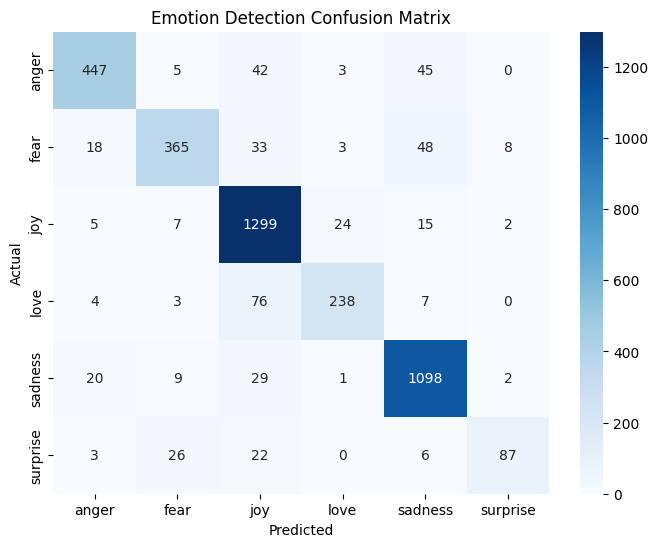


💾 Model and vectorizer saved successfully!
Saved in: ../models
🗣️ 'I am really happy today!' → joy
🗣️ 'Everything is going wrong.' → fear
🗣️ 'I'm scared for my exam.' → fear


In [4]:
# ============================================
# 📘 Emotion Detection Baseline Model
# TF-IDF + Logistic Regression
# ============================================

# Step 1: Imports
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already
nltk.download('stopwords')

# ---------------------------------------------
# Step 2: Load dataset
# ---------------------------------------------
DATA_PATH = "../data/emotion_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# ---------------------------------------------
# Step 3: Basic preprocessing
# ---------------------------------------------
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

print("\nSample cleaned text:")
print(df[['text', 'clean_text']].head())

# ---------------------------------------------
# Step 4: Split data
# ---------------------------------------------
X = df['clean_text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))

# ---------------------------------------------
# Step 5: Vectorize text
# ---------------------------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("\nTF-IDF shape:", X_train_vec.shape)

# ---------------------------------------------
# Step 6: Train model
# ---------------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# ---------------------------------------------
# Step 7: Evaluate model
# ---------------------------------------------
y_pred = model.predict(X_test_vec)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Emotion Detection Confusion Matrix")
plt.show()

# ---------------------------------------------
# Step 8: Save model + vectorizer
# ---------------------------------------------
MODEL_DIR = "../models"
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(model, os.path.join(MODEL_DIR, "emotion_model.pkl"))
joblib.dump(vectorizer, os.path.join(MODEL_DIR, "vectorizer.pkl"))

print("\n💾 Model and vectorizer saved successfully!")
print("Saved in:", MODEL_DIR)

# ---------------------------------------------
# Step 9 (Optional): Quick prediction test
# ---------------------------------------------
sample_text = ["I am really happy today!", "Everything is going wrong.", "I'm scared for my exam."]
sample_clean = [clean_text(t) for t in sample_text]
sample_vec = vectorizer.transform(sample_clean)
preds = model.predict(sample_vec)

for text, pred in zip(sample_text, preds):
    print(f"🗣️ '{text}' → {pred}")


In [3]:
pip install pandas numpy scikit-learn joblib matplotlib seaborn nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
